<a href="https://colab.research.google.com/github/gg5d/DS-1002/blob/main/pandas_data_cleaning2_student_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas Data Cleaning II

### University of Virginia
### DS1002: Programming for Data Science
### Last Updated: September 27, 2023
### Last Reviewed: September 27, 2023
---

### PREREQUISITES
- data types
- pandas dataframes
- pandas data cleaning I

### OBJECTIVES
- Problems with text and categorical data

In [ ]:
import pandas as pd
import numpy as np

## Categorical Data & Membership Constraints

- Has a predefined set of categories

- Value can only be one of the membership categories

- Often coded as numbers for further analysis techniques (like machine learning)

### Concerns in categorical data

1. Errors occur when observations have values that go beyond the predefined catogories

2. Errors also occur with inconsistent fields

3. Needing to collapse categories

4. Data type not being defined as 'category'

### Fixing observations that go beyond predefined categories

- We can drop, remap, or infer categories to fix

- We covered simple examples of these during Pandas Data Cleaning I

- Here is more complex example:

In [ ]:
# import csv's

study = pd.read_csv('data/study.csv')
categories = pd.read_csv('data/blood_categories.csv')

In [ ]:
study

,name,birthday,blood_type
0,Beth,10/20/19,B-
1,Paul,7/8/20,A-
2,Helen,8/12/19,O+
3,Jennifer,3/17/19,O-
4,Keith,12/17/19,Z+
5,Kelly,4/27/20,A+
6,Rachel,4/19/19,AB+


In [ ]:
categories

,blood_type
0,O-
1,O+
2,A-
3,A+
4,B+
5,B-
6,AB+
7,AB-


We can check for errors with using joins.

![](images/joins.png)

**So a left anti join between study and categories would give us this:**

![](images/antijoin.png)

**An inner join between study and category would give us:**

![](images/innerjoin.png)

**Let's do this in python**

**`.set()`**  
**`.difference()`**

[Geeks for Geeks](https://www.geeksforgeeks.org/python-set-difference/)

*Note: these are from python not pandas*

In [ ]:
set(study['blood_type'])

{'A+', 'A-', 'AB+', 'B-', 'O+', 'O-', 'Z+'}

Find inconsistent categories in study_data: remove all blood_data from blood_type

Use the method set(...).difference(...)

[.difference()](https://www.geeksforgeeks.org/python-set-difference/#)

In [ ]:


inconsistent_categories = set(......).difference(...........)
inconsistent_categories

{'Z+'}

In [ ]:
study['blood_type']

0     B-
1     A-
2     O+
3     O-
4     Z+
5     A+
6    AB+
Name: blood_type, dtype: object

Use .isin(....)
to check which blood_types are in inconsistent_categories

0    False
1    False
2    False
3    False
4     True
5    False
6    False
Name: blood_type, dtype: bool

In [ ]:
find inconsistent rows

In [ ]:
#

inconsistent_rows =  # gives a boolean series
inconsistent_rows

In [ ]:
Show the inconsistent rows of study

In [ ]:
# subset study dataframe based on boolean values


,name,birthday,blood_type
4,Keith,12/17/19,Z+


Show rows of study which are NOT inconsistent. Use ~

In [ ]:
# give a boolean series


0     True
1     True
2     True
3     True
4    False
5     True
6     True
Name: blood_type, dtype: bool

Drop inconsistent rows from **study**. Use ~

In [ ]:
# drop inconsistent rows
consistent_data =
consistent_data

,name,birthday,blood_type
0,Beth,10/20/19,B-
1,Paul,7/8/20,A-
2,Helen,8/12/19,O+
3,Jennifer,3/17/19,O-
5,Kelly,4/27/20,A+
6,Rachel,4/19/19,AB+


### Fixing value inconsistency

In [ ]:
# import `marriage_status` dataset
marriage = pd.read_csv('data/marriage_status.csv')

In [ ]:
marriage#.head()

,marriage_status
0,divorced
1,separated
2,married
3,UNMARRIED
4,MARRIED
5,MARRIED
6,married
7,unmarried
8,UNMARRIED
9,divorced


In [ ]:
marriage.shape

(21, 1)

How many are there for each label? Use [.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

marriage_status
married      6
unmarried    4
divorced     3
separated    3
UNMARRIED    3
MARRIED      2
Name: count, dtype: int64

For this example we can either capitalize or lowercase the values:

[str.upper()](https://docs.python.org/3.8/library/stdtypes.html#str.upper)

[str.lower()](https://docs.python.org/3.8/library/stdtypes.html#str.lower)

In [ ]:
# Capitalize
marriage['marriage_status'] =
marriage['marriage_status'].value_counts()

marriage_status
MARRIED      8
UNMARRIED    7
DIVORCED     3
SEPARATED    3
Name: count, dtype: int64

In [ ]:
# Lowercase
marriage['marriage_status'] =
marriage['marriage_status'].value_counts()


marriage_status
married      8
unmarried    7
divorced     3
separated    3
Name: count, dtype: int64

### Collapsing data into categories

* Often we will need to distill continuous data into categories
* Categories should have evidence-based backing behing them
* Categories can increase interpretability but can also lose valuable information

In [ ]:
income = pd.read_csv('data/income.csv')
income

,household_income
0,88000
1,47000
2,155000
3,147000
4,250000
5,107000
6,700000
7,120000
8,90000
9,33000


[**`.qcut()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) ($\leftarrow$ it's a link)

* automatically divides data into categories based on the argument `q` and the distribution of data

cut household_income in 3 groups with group_names = ['0-100K', '100K-500K', '500K+']


In [ ]:
group_names =
income['income_group'] = pd.qcut(income['household_income'], q = ...,
                                     labels = ........)
income

Is it correct?

In [ ]:
income['income_group'].value_counts()

income_group
0-100K       4
500K+        4
100K-500K    3
Name: count, dtype: int64

We can also use [**`.cut()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

* Allows you to use categories cut-off ranges with the `bins` argument

In [ ]:
ranges = [0, 100000, 500000, np.inf]
group_names = ['0-100K', '100K-500K', '500K+']
income['income_group'] = pd.cut(income['household_income'], bins = .....,
                                     labels = ..........)

income[['income_group', 'household_income']]

,income_group,household_income
0,0-100K,88000
1,0-100K,47000
2,100K-500K,155000
3,100K-500K,147000
4,100K-500K,250000
5,100K-500K,107000
6,500K+,700000
7,100K-500K,120000
8,0-100K,90000
9,0-100K,33000


## Map cateogories into fewer ones

In [ ]:
computer = pd.read_csv('data/computer.csv')
computer

,operating_system
0,Microsoft
1,MacOS
2,IOS
3,Android
4,Linux
5,Linux
6,IOS
7,Microsoft
8,Microsoft
9,MacOS


We want to collapse the `operating system` column into `'DesktopOS', 'MobileOS'`

In [ ]:
# create dictionary
mapping = {'Microsoft': 'DesktopOS', 'MacOS': 'DesktopOS', 'Linux': 'DesktopOS', 'IOS': 'MobileOS', 'Android': 'MobileOS'}

use [`.replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) ($\leftarrow$ it's a link)


In [ ]:
computer['operating_system_category'] =
computer['operating_system_category'].unique()

array(['DesktopOS', 'MobileOS'], dtype=object)

In [ ]:
computer.head()

,operating_system,operating_system_category
0,Microsoft,DesktopOS
1,MacOS,DesktopOS
2,IOS,MobileOS
3,Android,MobileOS
4,Linux,DesktopOS


## Text Data

* Common type of data

* Common text data problems are:
1) data inconsistency
2) fixed length violations
3) typos

In [ ]:
phones = pd.read_csv('data/phone_numbers.csv')
phones

,full_name,phone_number
0,Noelani A. Gray,001-702-397-5143
1,Myles Z. Gomez,001-329-485-0540
2,Gil B. Silva,001-195-492-2338
3,Prescott D. Hardin,+1-297-996-4904
4,Benedict G. Valdex,001-969-820-3536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,001-536-175-8444
7,Hedley I. Logan,001-681-552-1823
8,Jack W. Carrillo,001-910-323-5265
9,Lionel M. Davis,001-143-119-9210


Ideally we want to remove dashes, have each phone number start with the full country code, and remove phone numbers that don't have full values listed.

Replace the '+' with '00'. Use [.str.replace(...)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html)

In [ ]:

phones['phone_number'] =
phones

,full_name,phone_number
0,Noelani A. Gray,001-702-397-5143
1,Myles Z. Gomez,001-329-485-0540
2,Gil B. Silva,001-195-492-2338
3,Prescott D. Hardin,001-297-996-4904
4,Benedict G. Valdex,001-969-820-3536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,001-536-175-8444
7,Hedley I. Logan,001-681-552-1823
8,Jack W. Carrillo,001-910-323-5265
9,Lionel M. Davis,001-143-119-9210


Replace the '-' with nothing

In [ ]:
phones['phone_number'] = phones['phone_number']
phones

,full_name,phone_number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,+12979964904
4,Benedict G. Valdex,0019698203536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


Replace phone numbers with lower than 10 digits to NaN.
Use [.str.len()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.len.html)

In [ ]:
# gets the length of the each phone number
digits =

# subset phone numbers with less than 10 digits, replace with np.nan

phones

,full_name,phone_number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdex,0019698203536
5,Reece M. Andrews,NaN
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


Lets' run few checks

In [ ]:
# checking data with assert statements

# find length of each row in phone_number columns
sanity_check =

# assert minimum phone_number lenth is 10
assert sanity_check.min() .......

**assert** all number do not have a '+' or '-'. Use [.str.contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html)

In [ ]:
assert phones['phone_number'].str.contains("'+'|'-'").any() == False

### More complicated regular expression (`regex`) examples

* Regular expressions give us the ability to search for any pattern in text data, like only digits for example

* They are like control + find in your browser, but more dynamic and robust

[regex](https://www.geeksforgeeks.org/python-regex/)

[regex HOWTO](https://docs.python.org/3/howto/regex.html)

In [ ]:
phones_complex = pd.read_csv('data/phone_numbers_complex.csv')
phones_complex

,full_name,phone_number
0,Olga Robinson,+(01706)-25891
1,Justina Kim,+0500-571437
2,Tamekah Henson,+0800-111A
3,Miranda Solis,+07058-979063
4,Caldwell Gilliam,+(016977)-8424


Replace letters (actually non-numbers) with nothing. Use [.str.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html)


include regex=True


In [ ]:
#\D+ mean anything that is not a digit, found in regex library

phones_complex['phone_number'] =
phones_complex

,full_name,phone_number
0,Olga Robinson,0170625891
1,Justina Kim,0500571437
2,Tamekah Henson,0800111
3,Miranda Solis,07058979063
4,Caldwell Gilliam,0169778424


## Data Uniformity

* We want data within columns to have the same units (temperature, weight, money)

* Or data, as as dates, to have the same format

In [ ]:
temps = pd.read_csv('data/temperatures.csv')
temps.head()

,date,temperature
0,2019-03-03,14.0
1,2019-03-04,15.0
2,2019-03-05,18.0
3,2019-03-06,16.0
4,2019-03-07,62.6


**Let's look at graph**

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt

Create a scatter plot with
[plt.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

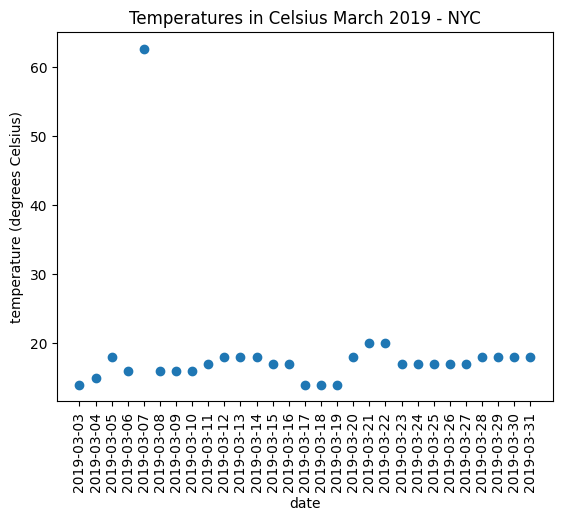

In [ ]:
plt.scatter(x = ...., y = ......., data = ......)

# create title 'Temperatures in Celsius March 2019 - NYC'
# xlabel 'date', and ylabel 'temperature (degrees Celsius)'









# show plot
plt.show()

**Convert farhenheit data to celsius**

use .loc to subset data above 40


In [ ]:
temp_fah =

# convert to celsius
temp_cels = (temp_fah - 32) * (5/9)

# Replace Farhenheit with Celsius. Use .loc and temp_cels


temps

In [ ]:
Plot the graph with the new temps

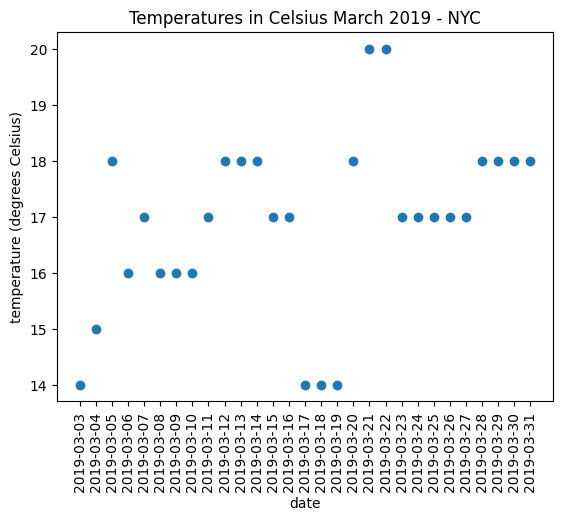

In [ ]:
plt.scatter(x = ...., y = ......., data = ......)

# create title 'Temperatures in Celsius March 2019 - NYC'
# xlabel 'date', and ylabel 'temperature (degrees Celsius)'









# show plot
plt.show()

**Clean-up Dates**

In [ ]:
birthdays = pd.read_csv('data/birthdays.csv')
birthdays.head()

,birth_date,first_name,last_name
0,27/27/2019,Rowan,Nunez
1,3/29/19,Brynn,Yang
2,"March 3rd, 2019",Sophia,Reilly
3,24-03-19,Deacon,Prince
4,6/3/19,Griffith,Neal


The [`datetime`](https://docs.python.org/3/library/datetime.html) ($\leftarrow$ it's a link) package is useful for representing dates

[How to format dates in python](https://stackabuse.com/how-to-format-dates-in-python/)

We also use [`pandas.to_datetime`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)
($\leftarrow$ it's a link)

This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.
* can recognize more formats automatically
* sometimes fails with erroneous or unrecongizable formats

Use pandas [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert 'birth_date' to datetime

In [ ]:
birthdays['birth_date'] =

/var/folders/c8/zxd3t4v929z2c76jt7j2j68m0000gq/T/ipykernel_34486/949370773.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'])


DateParseError: Invalid date specified (27/27), at position 0

**Doesn't work!**

try with **error='coerce'**  (return NA for rows where conversion failed)

and with **format= 'mixed'** (Check [this link](https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html))

In [ ]:
birthdays['birth_date'] =


In [ ]:
birthdays.head()

,birth_date,first_name,last_name
0,NaT,Rowan,Nunez
1,2019-03-29,Brynn,Yang
2,2019-03-03,Sophia,Reilly
3,2019-03-24,Deacon,Prince
4,2019-06-03,Griffith,Neal


Use [dt.strftime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html) to set '%d-%m-%Y'

In [ ]:
birthdays['birth_date'] =
birthdays.head()

,birth_date,first_name,last_name
0,NaN,Rowan,Nunez
1,29-03-2019,Brynn,Yang
2,03-03-2019,Sophia,Reilly
3,24-03-2019,Deacon,Prince
4,03-06-2019,Griffith,Neal


**Ambiguous Data**

Is `2019-03-06` in June or March?

* Can convert to `NA` or treat accordingly
* Can infer - this is where knowing your data is useful